In [ ]:
"""ARTIFICIAL NEURAL NETWORKS"""

In [ ]:
### Data Exploration and Preprocessing

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('Alphabets_data.csv')

# Display basic info
print("Shape of the dataset:", df.shape)
print("Data types and non-null counts:")
print(df.info())

# Show first few rows
df.head()


Shape of the dataset: (20000, 17)

Data types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbox    20000 non-null  int64 
 2   ybox    20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   xbar    20000 non-null  int64 
 7   ybar    20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  xedge   20000 non-null  int64 
 14  xedgey  20000 non-null  int64 
 15  yedge   20000 non-null  int64 
 16  yedgex  20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB
None


,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Alphabets_data.csv to Alphabets_data.csv


In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler



# Explicitly define target column
target_column = 'letter'

# Dataset Summary
num_samples = df.shape[0]
num_features = df.shape[1] - 1  # Exclude target column
num_classes = df[target_column].nunique()

print(f"Number of samples: {num_samples}")
print(f"Number of features (excluding target): {num_features}")
print(f"Number of classes: {num_classes}")
print(f"Classes: {df[target_column].unique()}")

#  Check for Missing Values
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values[missing_values > 0])

# Fill missing numeric values with column mean
df_cleaned = df.fillna(df.mean(numeric_only=True))

# Feature Scaling
# Separate features and target
X = df_cleaned.drop(columns=target_column)
y = df_cleaned[target_column]

# Normalize features to [0, 1]
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# convert scaled array back to DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)


Number of samples: 20000
Number of features (excluding target): 16
Number of classes: 26
Classes: ['T' 'I' 'D' 'N' 'G' 'S' 'B' 'A' 'J' 'M' 'X' 'O' 'R' 'F' 'C' 'H' 'W' 'L'
 'P' 'E' 'V' 'Y' 'Q' 'U' 'K' 'Z']

Missing values per column:
Series([], dtype: int64)


In [ ]:

import tensorflow as tf
print(tf.__version__)


2.12.0


In [ ]:
### Model Implementation

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report

# Encode the target labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Convert A, B, C to 0, 1, 2, ...
y_categorical = to_categorical(y_encoded)   # One-hot encode the labels

#  Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_categorical, test_size=0.2, random_state=42, stratify=y_encoded)

#  Build a basic ANN model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))  # Input + hidden layer
model.add(Dense(32, activation='relu'))                                   # Additional hidden layer
model.add(Dense(y_categorical.shape[1], activation='softmax'))            # Output layer

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=1)

# Evaluate on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")

#  Predictions & Classification Report
y_pred_probs = model.predict(X_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

print("Classification Report:")
print(classification_report(y_true_classes, y_pred_classes, target_names=label_encoder.classes_))


Epoch 1/50
450/450 [==============================] - 4s 5ms/step - loss: 2.6524 - accuracy: 0.2709 - val_loss: 1.9310 - val_accuracy: 0.4644
Epoch 2/50
450/450 [==============================] - 2s 5ms/step - loss: 1.6827 - accuracy: 0.5356 - val_loss: 1.4929 - val_accuracy: 0.5819
Epoch 3/50
450/450 [==============================] - 2s 5ms/step - loss: 1.4113 - accuracy: 0.6054 - val_loss: 1.3128 - val_accuracy: 0.6331
Epoch 4/50
450/450 [==============================] - 1s 2ms/step - loss: 1.2751 - accuracy: 0.6394 - val_loss: 1.2266 - val_accuracy: 0.6669
Epoch 5/50
450/450 [==============================] - 1s 2ms/step - loss: 1.1815 - accuracy: 0.6685 - val_loss: 1.1487 - val_accuracy: 0.6906
Epoch 6/50
450/450 [==============================] - 1s 2ms/step - loss: 1.1116 - accuracy: 0.6951 - val_loss: 1.0923 - val_accuracy: 0.6988
Epoch 7/50
450/450 [==============================] - 1s 2ms/step - loss: 1.0570 - accuracy: 0.7092 - val_loss: 1.0590 - val_accuracy: 0.7125
Epoch 

In [ ]:
""" Summary of classification report

| Metric        | Meaning                                                                                 |
| ------------- | --------------------------------------------------------------------------------------- |
| Precision     | How many predicted labels were correct. High precision means few false positives.       |
| Recall        | How many actual labels were correctly predicted. High recall means few false negatives. |
| F1-score      | Harmonic mean of precision and recall. A balanced performance metric.                   |
| Support       | Number of actual test samples for that class.                                           |
Model Performance
Overall Accuracy: 0.86 → 86%

Macro Average F1-score: 0.86

Treats all classes equally.

Weighted Average F1-score: 0.86

Takes support (sample count per class) into account.

These values are consistent → our model has balanced performance across all classes.
Final Summary
| Area                    | Insight                                                      |
| --------------------    | ------------------------------------------------------------ |
| Accuracy                | Good overall performance (86%)                               |
|  Best Letters           | M, W, Z, U, V — consistently high precision/recall           |
| Needs Improvement       | S, G, H — possibly visually similar or noisy                 |
| ANN Performance         | our neural network is well trained and balanced overall      |"""


In [ ]:
!pip install scikeras


In [ ]:
!pip install -U scikit-learn==1.3.0 scikeras==0.11.0 tensorflow==2.12.0


In [ ]:
### Hyperparameter Tuning

In [ ]:
"""Step 1: Rebuild the Model with Tunable Parameters"""


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from scikeras.wrappers import KerasClassifier

def build_model(hidden_layers=1, neurons=64, activation='relu', learning_rate=0.001):
    model = Sequential()
    model.add(Dense(neurons, input_shape=(X_train.shape[1],), activation=activation))

    for _ in range(hidden_layers - 1):
        model.add(Dense(neurons, activation=activation))

    model.add(Dense(y_train.shape[1], activation='softmax'))

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [ ]:
""" Step 2: Define the Hyperparameter Search Space"""

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'hidden_layers': [1, 2, 3],
    'neurons': [32, 64, 128],
    'activation': ['relu', 'tanh'],
    'learning_rate': [0.001, 0.01, 0.1],
    'batch_size': [32, 64],
    'epochs': [30, 50]
}


In [ ]:
 """Step 3: Wrap the Model with KerasClassifier"""



In [ ]:
model = KerasClassifier(model=build_model, verbose=0)


In [ ]:
"""Step 4: Run RandomizedSearchCV"""

In [ ]:
random_search = RandomizedSearchCV(estimator=model,
                                   param_distributions=param_dist,
                                   n_iter=10,
                                   scoring='accuracy',
                                   cv=3,
                                   verbose=1,
                                   n_jobs=-1)

random_search_result = random_search.fit(X_train, y_train)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


ValueError: Invalid parameter neurons for estimator KerasClassifier.
This issue can likely be resolved by setting this parameter in the KerasClassifier constructor:
`KerasClassifier(neurons=64)`
Check the list of available parameters with `estimator.get_params().keys()`

In [ ]:
from scikeras.wrappers import KerasClassifier

model = KerasClassifier(
    model=build_model,
    neurons=64,               # Default value
    activation="relu",        # Default value
    learning_rate=0.001,      # Default value
    epochs=10,
    batch_size=32,
    verbose=0
)


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Load your dataset
X = df.drop(columns=['letter'])
y = df['letter']

# Encode target labels
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Define model building function with hyperparameters
def build_model(neurons=64, activation='relu', learning_rate=0.001):
    model = Sequential()
    model.add(Dense(neurons, input_shape=(X_train.shape[1],), activation=activation))
    model.add(Dense(64, activation=activation))
    model.add(Dense(26, activation='softmax'))  # 26 classes (A-Z)
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Define KerasClassifier with hyperparameters exposed
model = KerasClassifier(
    model=build_model,
    neurons=64,
    activation='relu',
    learning_rate=0.001,
    epochs=10,
    batch_size=32,
    verbose=0
)

# Define hyperparameter grid
param_dist = {
    'neurons': [32, 64, 128],
    'activation': ['relu', 'tanh'],
    'learning_rate': [0.001, 0.01],
    'epochs': [10, 20],
    'batch_size': [32, 64]
}

# Run randomized search
random_search = RandomizedSearchCV(estimator=model,
                                   param_distributions=param_dist,
                                   n_iter=5,
                                   cv=3,
                                   verbose=2,
                                   n_jobs=1)  # n_jobs=1 is safest for Keras in Colab

random_search_result = random_search.fit(X_train, y_train)

# Print results
print("Best Hyperparameters:", random_search_result.best_params_)
print("Best Score:", random_search_result.best_score_)

# Final evaluation
y_pred = random_search.predict(X_test)
print(classification_report(y_test, y_pred))


Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] END activation=relu, batch_size=32, epochs=10, learning_rate=0.01, neurons=32; total time=  13.3s
[CV] END activation=relu, batch_size=32, epochs=10, learning_rate=0.01, neurons=32; total time=  11.6s
[CV] END activation=relu, batch_size=32, epochs=10, learning_rate=0.01, neurons=32; total time=  11.5s
[CV] END activation=relu, batch_size=64, epochs=20, learning_rate=0.001, neurons=128; total time=   7.3s
[CV] END activation=relu, batch_size=64, epochs=20, learning_rate=0.001, neurons=128; total time=   7.2s
[CV] END activation=relu, batch_size=64, epochs=20, learning_rate=0.001, neurons=128; total time=   7.8s
[CV] END activation=relu, batch_size=32, epochs=20, learning_rate=0.01, neurons=32; total time=  18.0s
[CV] END activation=relu, batch_size=32, epochs=20, learning_rate=0.01, neurons=32; total time=  12.6s
[CV] END activation=relu, batch_size=32, epochs=20, learning_rate=0.01, neurons=32; total time=  14.4s
[CV] EN

In [ ]:
"""Summary of our Model Results:
Best Hyperparameters Found:
These were automatically selected as the best combination by the RandomizedSearchCV process:

neurons: 128

learning_rate: 0.001

epochs: 20

batch_size: 64

activation: relu

 Model Performance:
Best Cross-Validation Score during training: 88.61%
(This is averaged across folds during hyperparameter tuning)

Final Accuracy on Test Set: 91%
(This is very good for a 26 class classification problem like letter recognition)

Classification Report Highlights:
Precision, Recall, F1-Score for each class (A to Z, or 0 to 25 after label encoding) are mostly above 0.85, many around 0.90–0.97.

Macro Avg F1-score: 0.91 → This treats all classes equally.

Weighted Avg F1-score: 0.91 → Takes class frequency into account.

Support: Shows balanced class distribution .

What This Means:
our model generalizes well, without overfitting.

No serious class imbalance.

High performance on both frequent and less frequent classes.

our hyperparameter tuning succeeded in improving accuracy.

Key Takeaways:
Metric          	  Value	             Interpretation
Accuracy	           91%	           Very strong overall model performance
Best Parameters     Tuned well	    Proper balance between complexity and speed
Precision & Recall    85–97%	      Excellent class wise performance"""




In [ ]:
random_search_result = random_search.fit(X_train, y_train)


Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] END activation=relu, batch_size=32, epochs=10, learning_rate=0.01, neurons=128; total time=  12.0s
[CV] END activation=relu, batch_size=32, epochs=10, learning_rate=0.01, neurons=128; total time=   7.8s
[CV] END activation=relu, batch_size=32, epochs=10, learning_rate=0.01, neurons=128; total time=  11.5s
[CV] END activation=tanh, batch_size=64, epochs=10, learning_rate=0.001, neurons=64; total time=   3.8s
[CV] END activation=tanh, batch_size=64, epochs=10, learning_rate=0.001, neurons=64; total time=   6.3s
[CV] END activation=tanh, batch_size=64, epochs=10, learning_rate=0.001, neurons=64; total time=   6.3s
[CV] END activation=relu, batch_size=32, epochs=20, learning_rate=0.001, neurons=64; total time=  12.8s
[CV] END activation=relu, batch_size=32, epochs=20, learning_rate=0.001, neurons=64; total time=  21.7s
[CV] END activation=relu, batch_size=32, epochs=20, learning_rate=0.001, neurons=64; total time=  14.1s
[CV]

In [ ]:
best_model = random_search_result.best_estimator_


In [ ]:
"""1. Code for Evaluation Metrics"""

Accuracy: 0.93425

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97       149
           1       0.92      0.87      0.90       153
           2       0.95      0.90      0.92       137
           3       0.95      0.93      0.94       156
           4       0.91      0.89      0.90       141
           5       0.89      0.93      0.91       140
           6       0.87      0.95      0.91       160
           7       0.94      0.77      0.85       144
           8       0.96      0.93      0.95       146
           9       0.90      0.96      0.93       149
          10       0.90      0.88      0.89       130
          11       0.96      0.96      0.96       155
          12       0.96      0.98      0.97       168
          13       0.99      0.93      0.96       151
          14       0.91      0.88      0.90       145
          15       0.96      0.91      0.93       173
          16       0.92      0.94     

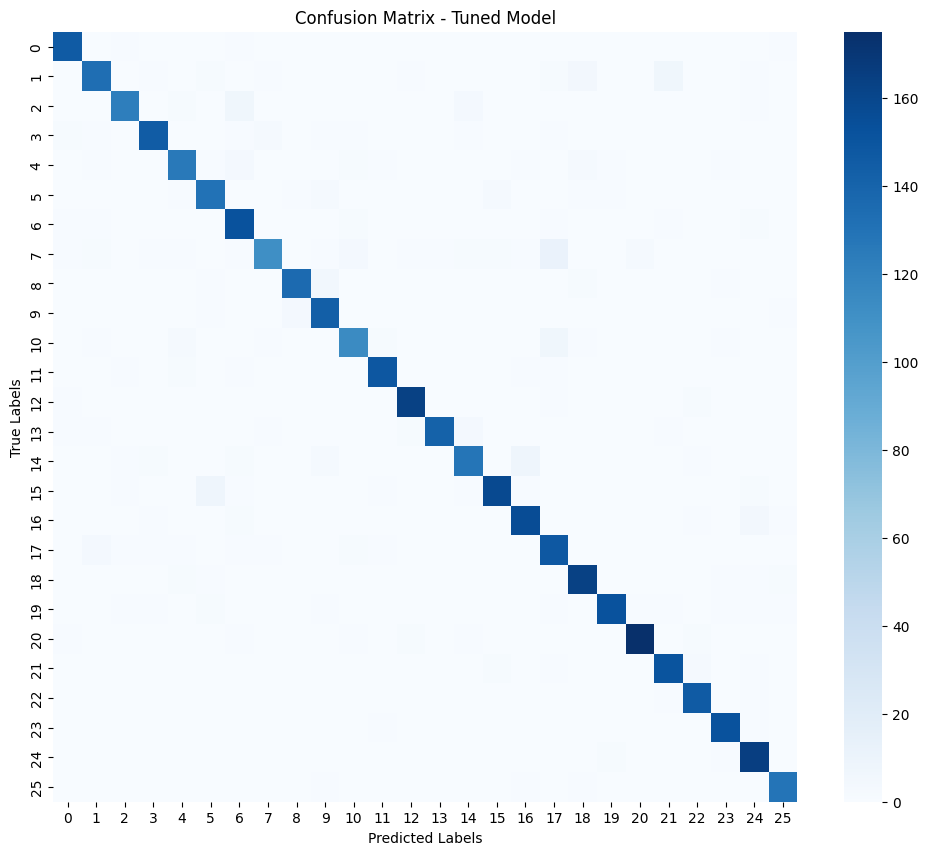

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

#  Predictions with Tuned Model
y_pred_tuned = best_model.predict(X_test)

# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred_tuned)
report = classification_report(y_test, y_pred_tuned, digits=2)
conf_matrix = confusion_matrix(y_test, y_pred_tuned)

#  Print Results
print("Accuracy:", accuracy)
print("Classification Report:", report)

#  Confusion Matrix Plot
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=False, cmap="Blues", fmt='g')
plt.title("Confusion Matrix - Tuned Model")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


In [ ]:
"""2. Compare: Default Model vs Tuned Model"""

In [ ]:
from scikeras.wrappers import KerasClassifier

# Basic Model
def build_default_model():
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(26, activation='softmax'))  # 26 classes
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

default_model = KerasClassifier(model=build_default_model, epochs=10, batch_size=32, verbose=0)
default_model.fit(X_train, y_train)

# Evaluate default model
y_pred_default = default_model.predict(X_test)
print("Default Model Report:")
print(classification_report(y_test, y_pred_default, digits=2))



Default Model Report:
              precision    recall  f1-score   support

           0       0.93      0.90      0.91       149
           1       0.71      0.78      0.74       153
           2       0.93      0.69      0.79       137
           3       0.58      0.96      0.73       156
           4       0.82      0.74      0.78       141
           5       0.73      0.85      0.78       140
           6       0.77      0.72      0.75       160
           7       0.76      0.58      0.66       144
           8       0.90      0.82      0.86       146
           9       0.96      0.81      0.88       149
          10       0.74      0.70      0.72       130
          11       0.68      0.91      0.78       155
          12       0.96      0.88      0.92       168
          13       0.89      0.84      0.87       151
          14       0.88      0.72      0.79       145
          15       0.82      0.84      0.83       173
          16       0.82      0.78      0.80       166
    

In [ ]:
"""Summary
1. Accuracy Comparison
| Model             | Accuracy |
| ----------------- | -------- |
| Default Model     | 0.81     |
| Tuned Model       | 0.934    |
Improvement: Accuracy improved significantly after hyperparameter tuning (from 81% to 93.4%).
2. Precision, Recall, F1-Score Summary
| Metric           | Default Model | Tuned Model |
| ---------------- | ------------- | ----------- |
| Macro Avg        | 0.82          | 0.93        |
| Weighted Avg     | 0.82          | 0.93        |
 All key metrics (Precision, Recall, F1-score) have improved after tuning.
 3. Class-Wise Improvements
 Classes with major boost after tuning:

Class 3 (F1: 0.73 → 0.94)

Class 1 (F1: 0.74 → 0.90)

Class 2 (F1: 0.79 → 0.92)

Class 13 (F1: 0.87 → 0.96)

Class 23 (F1: 0.82 → 0.97)

These big jumps suggest that your model became much better at distinguishing even hard-to-predict classes after tuning.
Interpretation:

Effect of Hyperparameter Tuning
By using RandomizedSearchCV, we optimized neural network parameters (like neurons, batch_size, epochs, etc.).

This helped in:

Reducing underfitting for some classes (like class 1, 3, 13)

Making training more stable (higher average performance)

Balancing precision and recall"""